# Lecture 2: Measurements and Observables
 (2020) 

Welcome to Lecture 2!<br>
After this lecture you will be able to:
1. Explain why Quantum Mechanics must be a probabilistic theory
2. Model a quantum measurement 
3. Compute the eigenbasis of an observable

---
***Recap of Lecture 1:***
_In Lecture 1 we have introduced quantum **States**: the first of the three pillars of Quantum Mechanics (States, Transformations and Measurements). We have seen that quantum states are vectors in a Hilbert space (which is a complex vector space). We have seen that qubits are the simplest possible quantum systems because their Hilbert space is only 2-dimensional, and thanks to this, qubit states can be visualized on the Bloch sphere. We have also seen that more complex systems have states that are defined on higher-dimensional spaces, even infinite-dimensional spaces (in which case it makes more sense to talk about wavefunctions, which are the continuum version of state vectors)._
    
---
***Preview of Lecture 2:***
_Today we will see how to model  **Measurements** in Quantum Mechanics. We will understand that quantum measurements have to be probabilistic and that this is a consequence of the fact that states are vectors and can be written using any basis. We will learn how to describe observable quantities as Hermitian matrices and how to compute the probability of the outcomes of the measurement of a system that is in a given state. Finally, we will associate outcomes to projectors (a particular type of matrix)_

---

# 1. Born's rule
In Quantum Mechanics, there a few fundamental laws and theorems. Born's rule is one of the most important ones, as it gives us the probability of a measurement result. Today we will see the simplest form of Born's rule, but it can be extended and genealized (we will do so in one of the next lectures).

The rule is pretty simple: if you have prepared a state $|\psi\rangle$ (recall that this is just a normalized complex vector), the probability to find it (through a measurement) in the state $|\phi\rangle$ is given by:

$$
P = |\langle\psi|\phi\rangle|^2.
$$

Pause for a moment and think about this: in quantum mechanics if you prepare a system in a given state, you have a non-zero probability to find it in another state! And the probability depends on the inner product between the states. The only guarantee that we have, therefore, is that we will never find the system in a state that is orthogonal to the one that we prepared it in (because in this case the inner product is zero and therefore the probability is zero).

Is this because measurement devices are imperfect? No, we didn't assume anything about the measurement devices. This happens because of the fact that the theory is embedded in linear algebra: a quantum state is a vector and so it can be written as a linear combination of basis states, but we have the freedom to pick the basis. So a quantum state has a non-zero component along any direction, except the directions that are exactly orthogonal to it. And consequently, we have a non-zero probability to find the state in any other state except the ones that are exactly orthogonal to it:

$$
|\langle\psi|\psi^\bot\rangle|^2 = 0.
$$

This is the mechanism which makes Quantum Mechanics a probabilistic theory. 


## 1.1 Bases and measurements
If we consider an orthonormal basis of our Hilbert space, made of the vectors $\{|v_i\rangle\}$, the probability to prepare the system in the state $|v_i\rangle$ and to find it in the state $|v_j\rangle$ is zero unless $i=j$. So these are all states which cannot be "mistaken" for each other and we can associate them to _independent_ results of a measurement.

This is teaching us three important facts about quantum measurements (for now, we will generalize measurements in an upcoming lecture):
1. To each basis of a Hilbert space corresponds a different measurement
2. Measurements have as many independent results as the dimension of the Hilbert space where the state is defined
3. Measurements project a state along the components of an orthonormal basis. And the probability of an outcome is proportional to the (square of the) projection along its corresponding basis element.

---
#### Activity 1: probabilities (15 minutes)
1. Write a function that takes two states $|\psi\rangle$ and $|\phi\rangle$ and it returns $|\langle\psi|\phi\rangle|^2$. The signature should be `f(array(complex), array(complex)) -> float`.
2. Make a more versatile version of this function: sometimes you want to compute the probability of finding a state $|\psi\rangle$ with respect to all the elements of a basis $\{|v_i\rangle\}$. You could do this by calling the previous function on all of the basis elements, but we would rather be more efficient and give the function all of the states at once, written as the rows of a matrix. The signature should be `f(array(complex), array(complex)) -> array(float)`.
---

In [343]:
def probabilities(psi, basis):
    return np.abs(np.conj(basis)@psi)**2

# 2. Observables
One of the major ideas that we learn in linear algebra is that given a diagonalizable matrix, there exists a basis that makes that matrix diagonal. This is the eigenbasis of that matrix, and therefore the action of the matrix on the basis elements is just to rescale them:

$$
M|v_i\rangle = \lambda_i|v_i\rangle
$$

But we know that to each basis corresponds a quantum measurement, so a diagonalizable matrix $M$ determines a specific measurement, i.e. the one that corresponds to its eigenbasis. Because of this, we say that $M$ represents an "observable quantity" (or we say that $M$ is an _Observable_).

The eigenvalues of $M$ are the numerical values associated to the each result (a bit like 20°C is the numerical value associated with a measurement of temperature). Since we only measure real numerical values and never complex ones, we restrict the quantum observables to be matrices with real eigenvalues. Matrices with real eigenvalues are "self-adjoint" or "Hermitian" (i.e. $M = M^\dagger$). So we identify Hermitian matrices to Observable quantities.

## 2.1 Effect of a measurement

The state of the system after a measurement is the one that corresponds to the result that we obtained. So for example, if we prepared the system in $|\psi\rangle$ and we found it in $|\phi\rangle$, the state of the system after the measurement is now $|\phi\rangle$ and there is no trace left of the previous state. There is no way to know what state the system was in before the measurement (we only know that it was not orthogonal to $|\phi\rangle$ otherwise we couldn't have obtained $|\phi\rangle$).

---
#### Answer in the chat:

If we measure the observable $M$ on a state $|\psi\rangle$ and obtain the result corresponding to the state $|v_i\rangle$, what happens if we measure $M$ again on the same system?

---

## 2.2 Expectation values

If we have an ensemble of systems that are all in the same state $|\psi\rangle$ and we measure an observable $M$, unless $|\psi\rangle$ is an eigenstate of $M$, we will not always obtain the same measurement result. Sometimes we will get $\lambda_1$, sometimes $\lambda_2$ etc... each value will occur with a certain probability given by the Born rule.

Specifically, if the value $\lambda_i$ is measured with probability $P_i=|\langle v_i|\psi\rangle|^2$, then the average value of a measurement of $M$ on the state $\psi$ is

$$
\langle M \rangle_\psi = \sum_i \lambda_i P_i = \sum_i \lambda_i |\langle v_i|\psi\rangle|^2
$$

Now, recall that $\langle a|b\rangle = \langle b|a\rangle^*$, then we can write

$$
\langle M \rangle_\psi = \sum_i \lambda_i \langle\psi|v_i\rangle\langle v_i|\psi\rangle = \langle\psi|\left(\sum_i \lambda_i|v_i\rangle\langle v_i|\right)|\psi\rangle = \langle\psi|M|\psi\rangle
$$

So the observable $M$ also allows us to compute very rapidly the expectation value of a measurement: we don't need to diagonalize the matrix, or fiddle with its eigenvectors and eigenvalues.

---
#### Activity 2: find the probability of the outcomes of a measurement (15 mins)

A system defined in a 4-dimensional Hilbert space is in the state $|\psi\rangle = (1/2, -1/2, 1/2, -1/2)$ (is this a valid state?).

We want to measure the observable defined by the Hermitian matrix
$$
M = 
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 0 & 2i & 5\\
3 & -2i & -1 & 0\\
4 & 5 & 0 & 0
\end{pmatrix}
$$

1. Verify that the $|\psi\rangle$ is a quantum state
2. Find the probabilities of the 4 outcomes of a measurement of the observable $M$

TIP: use `np.linalg.eigh` to find eigenvalues and eigenvectors of $M$. Note that `np.linalg.eigh(M)` returns two numpy arrays: the first contains the eigenvalues, the second is a matrix whose **columns** are the eigenvectors of $M$.

---

In [359]:
psi = np.array([0.5, -0.5, 0.5, -0.5])

In [360]:
np.linalg.norm(psi)

1.0

In [362]:
M = np.array([
    [1,2,3,4],
    [2,0,2j,5],
    [3,-2j,-1,0],
    [4,5,0,0]
])

eigenvalues, eigenvectors = np.linalg.eig(M)

In [363]:
eigenvalues

array([ 8.19924878-5.73279501e-17j,  1.35079026-3.07780833e-16j,
       -3.48156248-2.34386538e-16j, -6.06847656+4.43838094e-17j])

In [364]:
probs = probabilities(psi, eigenvectors.T)

In [365]:
probs

array([0.04685976, 0.81914025, 0.124656  , 0.009344  ])

In [366]:
np.conj(psi).T @ (M @ psi)

(1+0j)

## 3. Projectors

When we have the eigenvalues $\lambda_i$ and the eigenvectors $|v_i\rangle$ of a matrix $M$, we can rewrite $M$ in the eigenvector basis:

$$
M = \sum_i \lambda_i|v_i\rangle\langle v_i|
$$

The object $|v_i\rangle\langle v_i|$ is an outer product of a vector by its hermitian conjugate (i.e. a column-by-row product), which gives a matrix. The matrix $\pi_i = |v_i\rangle\langle v_i|$ is a rank-1 projector. Projectors are operators that have the following property: $\pi_i^2 = \pi_i$:

$$\pi_i^2 = |v_i\rangle\langle v_i|^2 = (|v_i\rangle\langle v_i|)(|v_i\rangle\langle v_i|) = |v_i\rangle\underbrace{\langle v_i|v_i\rangle}_1\langle v_i| = |v_i\rangle\langle v_i| = \pi_i$$

So the matrix $M$ can be rewritten as a sum over projectors:

$$
M = \sum_i\lambda_i \pi_i
$$

We can rewrite also Born's rule using projectors :

$$
P_i = |\langle v_i|\psi\rangle|^2 = \langle \psi|v_i\rangle\langle v_i|\psi\rangle = \langle \psi|\pi_i|\psi\rangle
$$

But this tells us that projectors (which are Hermitian) are probability operators, because their expectation value is a probability (the probability of measuring the state that they project onto). 

NOTE: _Projectors are not the only probability operators: in a future lecture we will see more general probability operators, but for now we can think of projectors as observables associated with a single measurement outcome._

---
#### Activity 3: Working with projectors (10 minutes)

1. Define the 4 projectors onto the eigenspaces of the operator $M$ defined in Activity 1.
2. Verify that the probabilities of the 4 outcomes can be computed via the formula $\langle\psi|\pi_i|\psi\rangle$.

---

In [379]:
projectors = [np.einsum('a,b -> ab', v, np.conj(v)) for v in eigenvectors.T]

print([np.real(np.einsum('a, ab, b', np.conj(psi), p, psi)) for p in projectors])
print(probs)

[0.0468597575301523, 0.8191402461617385, 0.12465599962138438, 0.009343996686724906]
[0.04685976 0.81914025 0.124656   0.009344  ]


# 4. Hamiltonians

One of the most important observables in Quantum Mechanics is the Hamiltonian. The Hamiltonian is the observable for the energy of a system. The energy of a system is important because it determines how quickly the system evolves in time. This is explained by the Schrödinger equation, but in order to talk about the Schrödinger equation we need first to introduce Transformations of quantum states and this is the focus of Lecture 3. For now, it's sufficint for you to know that such an observable exists and it's called the Hamiltonian.

For example, in Lecture 1 we saw that a good basis for the particle in a box was produced by the sine function. But we didn't know why. The reason is that that basis is the eigenbasis of the Hamiltonian for a particle in a box! So if we write the state of the particle in the basis of the Hamiltonian, then it is very simple to compute its time evolution (as we will see in Lecture 3).

Here we have the justification of the basis used in lecture 1:

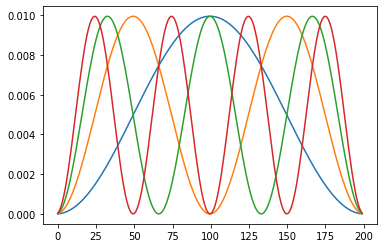

In [384]:
import matplotlib.pyplot as plt

N = 200
H = (-np.diag(np.ones(N-1), k=-1) + 2*np.diag(np.ones(N), k=0) - np.diag(np.ones(N-1), k=1)) # this is a hack

e,v = np.linalg.eig(H)
for n in np.argsort(e)[0:4]:
    plt.plot(np.abs(v[:,n])**2)